# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [6]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_hh_income.shape, df_pct_poverty.shape, df_pct_completed_hs.shape, 
df_share_race_city.shape, df_fatalities.shape

((29268, 7), (2535, 14))

In [8]:
print(f"hh_income's columns {df_hh_income.columns}\n")
print(f"pct_poverty's columns {df_pct_poverty.columns}\n")
print(f"pct_completed_hs's columns {df_pct_completed_hs.columns}\n")
print(f"share_race_city's columns {df_share_race_city.columns}\n")
print(f"fatalities's columns {df_fatalities.columns}")


hh_income's columns Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

pct_poverty's columns Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

pct_completed_hs's columns Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

share_race_city's columns Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

fatalities's columns Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [9]:
print(f"hh_income's duplicates {df_hh_income.duplicated().sum()}\n")
print(f"pct_poverty's duplicates {df_pct_poverty.duplicated().sum()}\n")
print(f"pct_completed_hs's duplicates {df_pct_completed_hs.duplicated().sum()}\n")
print(f"share_race_city's duplicates {df_share_race_city.duplicated().sum()}\n")
print(f"fatalities's duplicates {df_fatalities.duplicated().sum()}")

hh_income's duplicates 0

pct_poverty's duplicates 0

pct_completed_hs's duplicates 0

share_race_city's duplicates 0

fatalities's duplicates 0


In [10]:
print(f"hh_income's nulls {df_hh_income.isnull().sum()}\n")
print(f"pct_poverty's nulls {df_pct_poverty.isnull().sum()}\n")
print(f"pct_completed_hs's nulls {df_pct_completed_hs.isnull().sum()}\n")
print(f"share_race_city's null {df_share_race_city.isnull().sum()}\n")
print(f"fatalities's nulls {df_fatalities.isnull().sum()}")

hh_income's nulls Geographic Area     0
City                0
Median Income      51
dtype: int64

pct_poverty's nulls Geographic Area    0
City               0
poverty_rate       0
dtype: int64

pct_completed_hs's nulls Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

share_race_city's null Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

fatalities's nulls id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: in

In [11]:
df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.replace('-', 0)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)
df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()

Geographic Area
AK   18.68
AL   20.61
AR   22.96
AZ   25.27
CA   16.89
CO   13.19
CT    9.14
DC   18.00
DE   12.56
FL   17.51
GA   23.66
HI   13.40
IA   12.23
ID   18.08
IL   13.85
IN   15.50
KS   14.72
KY   20.08
LA   22.29
MA    9.55
MD   10.27
ME   16.89
MI   17.90
MN   13.75
MO   19.93
MS   26.88
MT   16.42
NC   19.72
ND   12.13
NE   12.92
NH   12.66
NJ    8.16
NM   22.51
NV   12.37
NY   11.64
OH   14.83
OK   20.55
OR   16.44
PA   12.49
RI   10.37
SC   22.11
SD   15.75
TN   19.89
TX   19.50
UT   11.72
VA   14.59
VT   13.79
WA   14.83
WI   12.86
WV   21.08
WY    9.06
Name: poverty_rate, dtype: float64

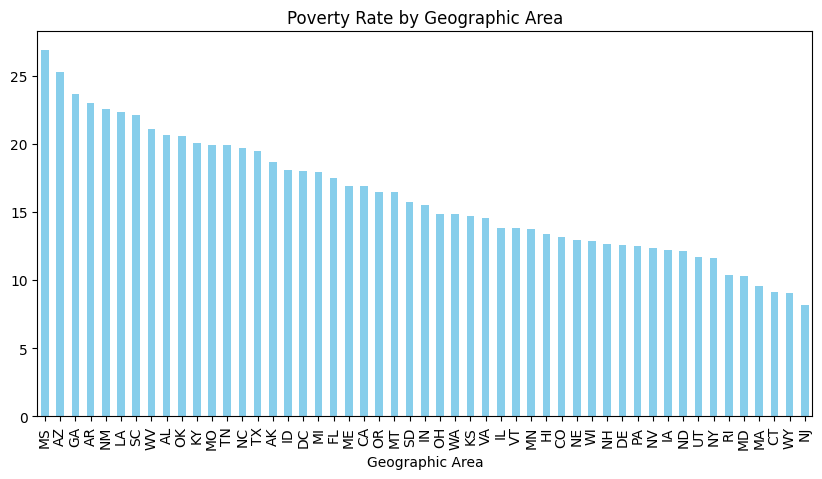

In [13]:
plot = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False).plot(kind='bar', 
                                                                             figsize=(10, 5),
                                                                             color='skyblue',
                                                                             title='Poverty Rate by Geographic Area')




# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

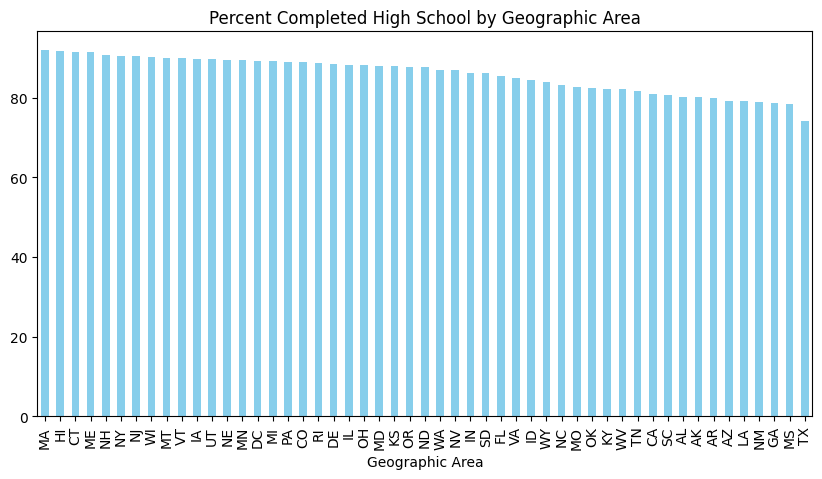

In [14]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.replace('-', 0)
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)
df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()
plot = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                                                    figsize=(10, 5),
                                                                                                    color='skyblue',
                                                                                                    title='Percent Completed High School by Geographic Area')
    

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [15]:
hs_completed = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=False)
poverty_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

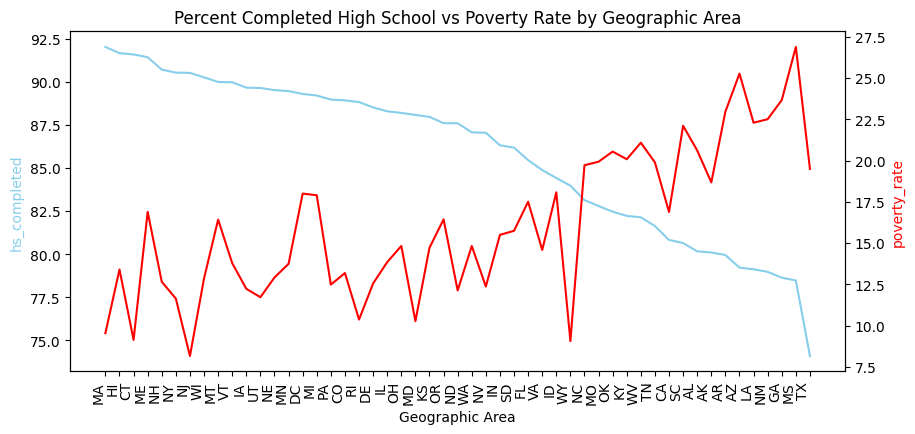

In [16]:
df = pd.concat([hs_completed, poverty_rate], axis=1)
df.columns = ['hs_completed', 'poverty_rate']
#line chart with 2 y axis
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(df.hs_completed, color='skyblue')
ax2.plot(df.poverty_rate, color='red')
ax1.set_xlabel('Geographic Area')   
ax1.set_ylabel('hs_completed', color='skyblue')
ax2.set_ylabel('poverty_rate', color='red')
plt.title('Percent Completed High School vs Poverty Rate by Geographic Area')
fig.autofmt_xdate(rotation=90)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

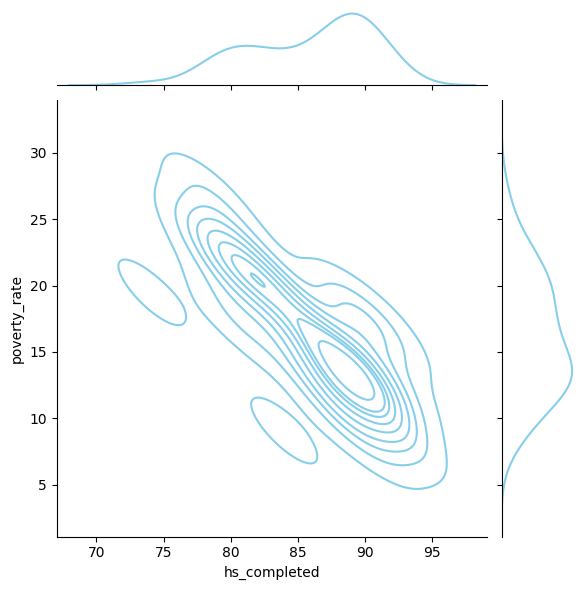

In [17]:
joint = sns.jointplot(x='hs_completed', y='poverty_rate', data=df, kind='kde', color='skyblue')

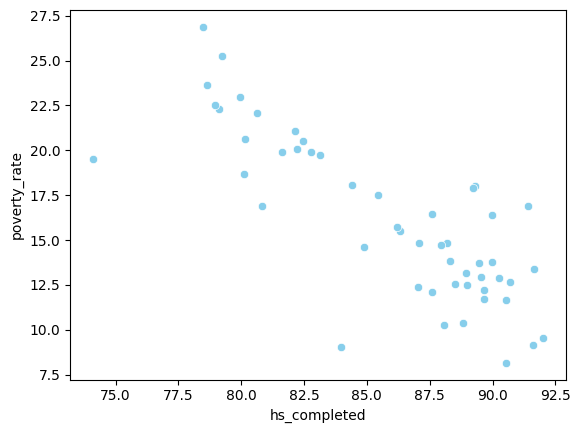

In [18]:
scatter = sns.scatterplot(x='hs_completed', y='poverty_rate', data=df, color='skyblue')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

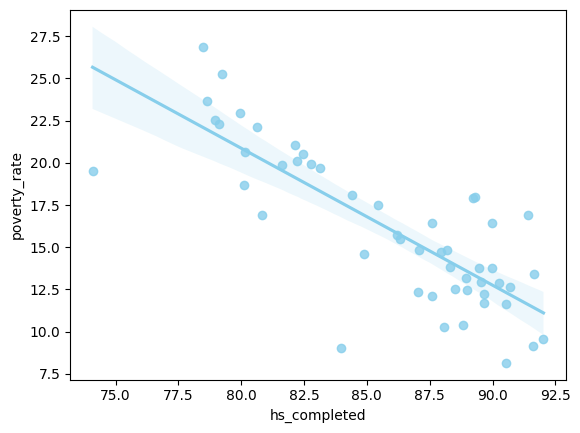

In [19]:
reg_plot = sns.regplot(x='hs_completed', y='poverty_rate', data=df, color='skyblue')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [20]:
#bar chart with sub sections race
columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
for column in columns:
    df_share_race_city[column] = df_share_race_city[column].replace('(X)', 0)
    df_share_race_city[column] =  df_share_race_city[column].astype(float)

df_share_race_white = df_share_race_city.groupby('Geographic area')['share_white'].mean().to_frame()
df_share_race_black = df_share_race_city.groupby('Geographic area')['share_black'].mean().to_frame()
df_share_race_hispanic = df_share_race_city.groupby('Geographic area')['share_hispanic'].mean().to_frame()
df_share_race_native_american = df_share_race_city.groupby('Geographic area')['share_native_american'].mean().to_frame()
df_share_race_asian = df_share_race_city.groupby('Geographic area')['share_asian'].mean().to_frame()

#merge them all together
new_frame = [df_share_race_asian, df_share_race_black, df_share_race_hispanic, df_share_race_native_american,
             df_share_race_white]

new_df = pd.concat(new_frame, axis=1)
new_df



,share_asian,share_black,share_hispanic,share_native_american,share_white
Geographic area,,,,,
AK,1.38,0.56,2.13,45.48,45.26
AL,0.48,23.32,2.98,0.66,72.51
AR,0.48,16.30,4.27,0.76,78.45
AZ,0.73,0.95,20.14,28.59,59.93
CA,5.54,2.68,29.51,1.72,71.54
CO,1.15,0.92,17.90,1.62,87.77
CT,2.99,4.99,7.98,0.66,86.11
DC,3.50,50.70,9.10,0.30,38.50
DE,2.00,15.39,7.42,0.52,76.25


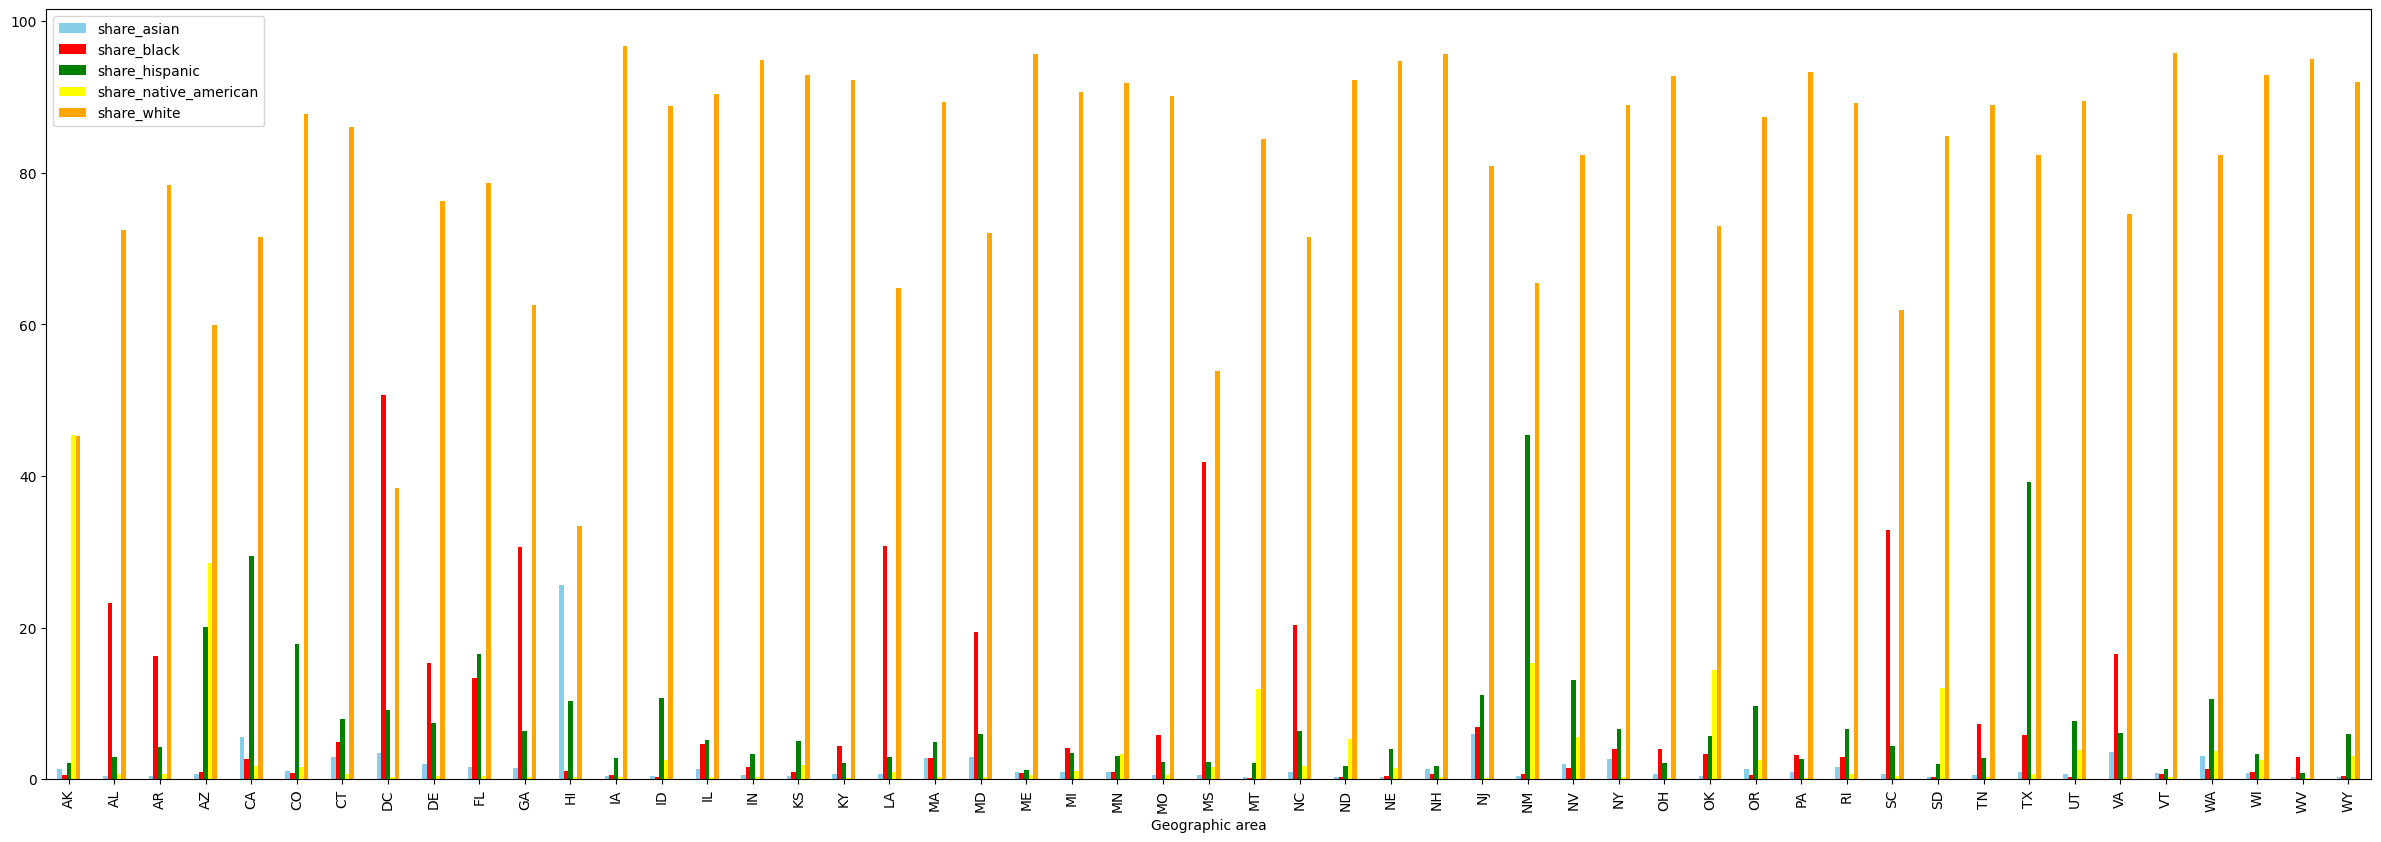

In [21]:
#bar chart with grouped sections
plot = new_df.plot(kind='bar',
                   figsize=(30, 10),
                   color=['skyblue', 'red', 'green', 'yellow', 'orange'])
                        

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

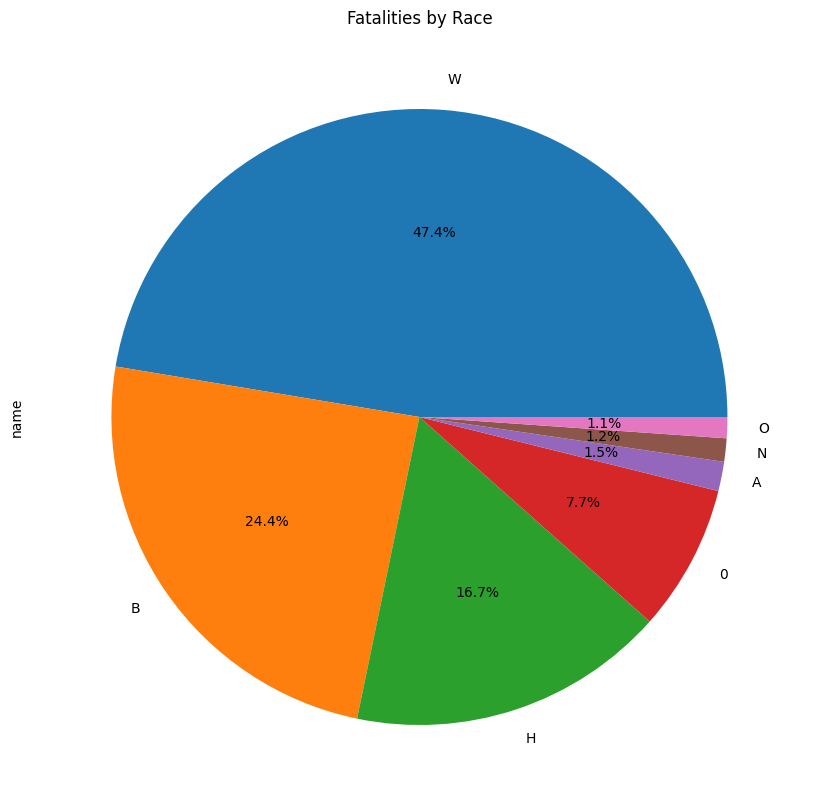

In [22]:
df_fatalities.groupby('race').count()['name'].sort_values(ascending=False)
#donut chart
donut = df_fatalities.groupby('race').count()['name'].sort_values(ascending=False).plot(kind='pie', 
                                                                                        figsize=(10, 10),
                                                                                        autopct='%1.1f%%',
                                                                                        title='Fatalities by Race')


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [23]:
df_fatalities.groupby('gender').count()['name'].sort_values(ascending=False)

gender
M    2428
F     107
Name: name, dtype: int64

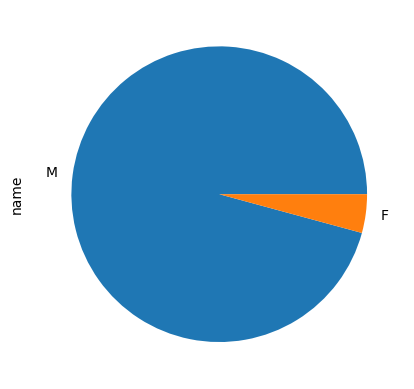

In [24]:
pie = df_fatalities.groupby('gender').count()['name'].sort_values(ascending=False).plot(kind='pie')


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

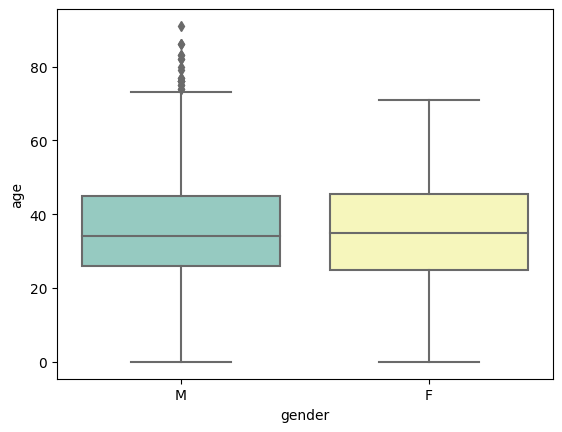

In [25]:
box_plot_gender = sns.boxplot(x=df_fatalities["gender"], y=df_fatalities["age"], data=df_fatalities, palette="Set3")

In [26]:
#manner of death by gender
gender_manner = df_fatalities.groupby(['gender', 'manner_of_death']).count()['name'].sort_values(ascending=False)
gender_manner

gender  manner_of_death 
M       shot                2261
        shot and Tasered     167
F       shot                 102
        shot and Tasered       5
Name: name, dtype: int64

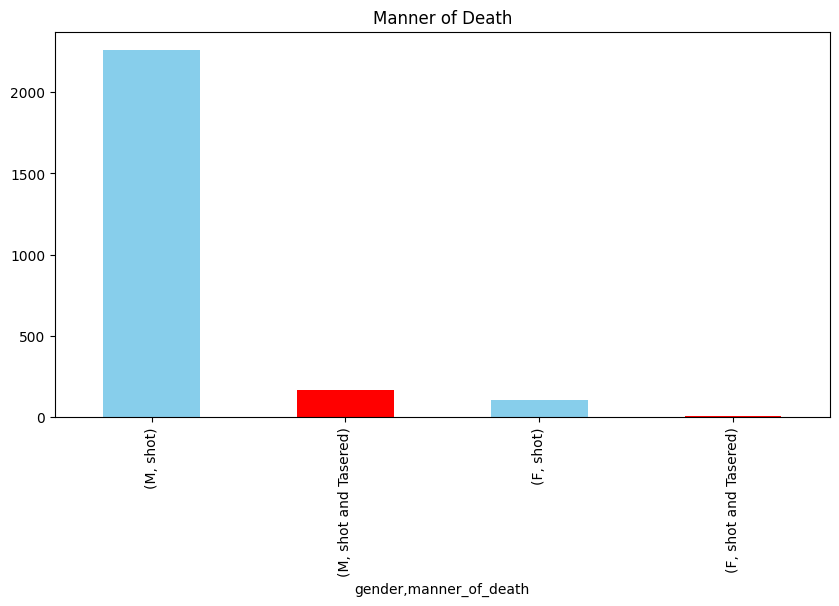

In [27]:
gender_manner_plot =   gender_manner.plot(kind='bar',   
                                            figsize=(10, 5),
                                            title='Manner of Death',
                                            #change bar color
                                            color=['skyblue', 'red'])
                                                                                                            

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

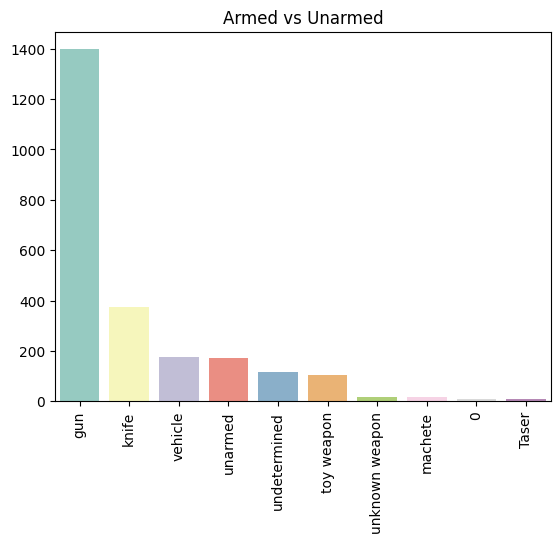

In [28]:
x = df_fatalities['armed'].value_counts().head(10).index

y = df_fatalities['armed'].value_counts().head(10).values

plot = sns.barplot(x=x, y=y, data=df_fatalities, palette='Set3')
plt.title('Armed vs Unarmed')
plt.xticks(rotation=90)
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [29]:
def get_age_share(df, age):
    return df[df.age == age].shape[0] / df.shape[0]

get_age_share(df_fatalities, 25)

0.04063116370808678

In [30]:
df_fatalities['age_share'] = df_fatalities['age'].apply(lambda x: get_age_share(df_fatalities, x))

In [31]:
#find all ages that are younger than 25 years old sum age_share
df_fatalities[df_fatalities['age'] < 25]['age_share'].sum()

12.206311637080866

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

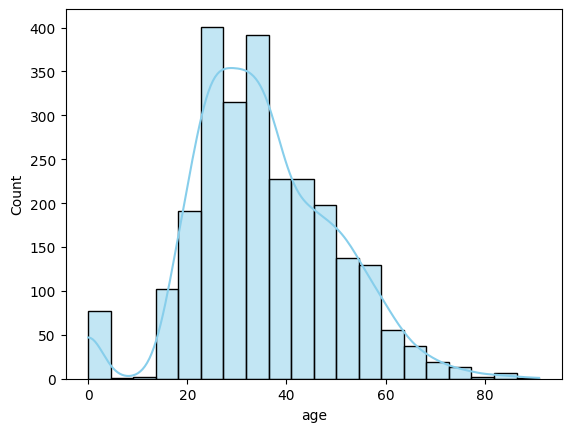

In [32]:
#histogram and KDE plot of their age
hist = sns.histplot(df_fatalities['age'], bins=20, kde=True, color='skyblue');

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

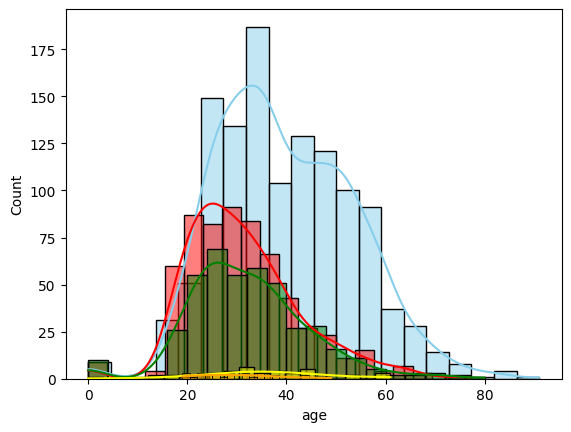

In [33]:
races = ["W", "B", "H", "A", "N", "O"]

#distribution of individual races
hist_white = sns.histplot(df_fatalities[df_fatalities.race == 'W']['age'], bins=20, kde=True, color='skyblue');
hist_black = sns.histplot(df_fatalities[df_fatalities.race == 'B']['age'], bins=20, kde=True, color='red');
hist_hispanic = sns.histplot(df_fatalities[df_fatalities.race == 'H']['age'], bins=20, kde=True, color='green');
hist_asian = sns.histplot(df_fatalities[df_fatalities.race == 'A']['age'], bins=20, kde=True, color='yellow');
hist_native_american = sns.histplot(df_fatalities[df_fatalities.race == 'N']['age'], bins=20, kde=True, color='orange');

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [34]:
df_fatalities.groupby('race').count()['name'].sort_values(ascending=False)

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: name, dtype: int64

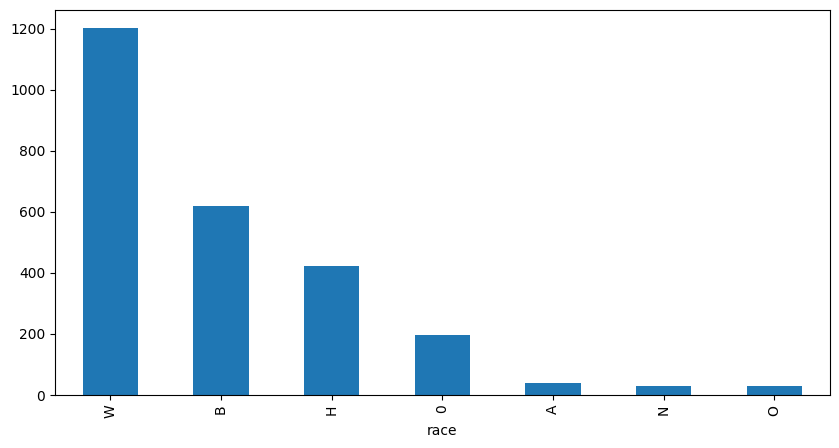

In [35]:
chart = df_fatalities.groupby('race').count()['name'].sort_values(ascending=False).plot(kind='bar',
                                                                                        figsize=(10, 5))
                                                                                
                    

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [36]:
#percentage who has a mental illness
df_fatalities['signs_of_mental_illness'].value_counts(normalize=True)

False   0.75
True    0.25
Name: signs_of_mental_illness, dtype: float64

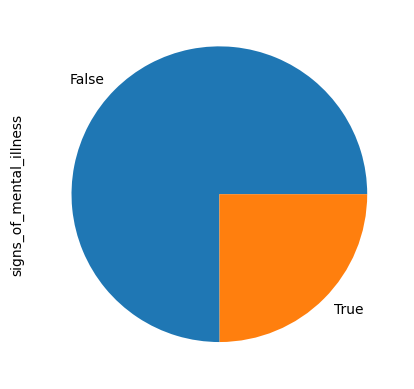

In [37]:
pie = df_fatalities['signs_of_mental_illness'].value_counts(normalize=True).plot(kind='pie')

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [38]:
df_fatalities['city'].value_counts().head(10)

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

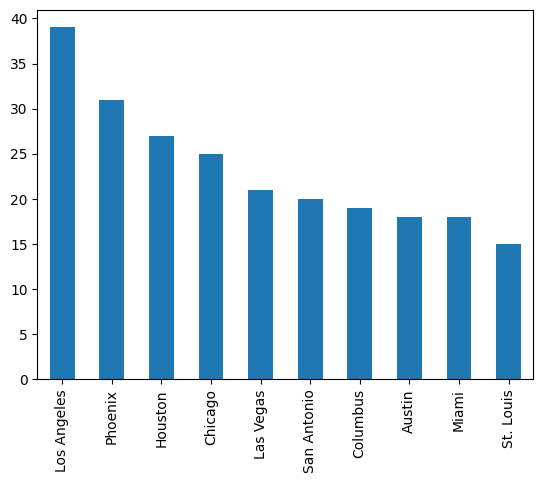

In [39]:
bar_plot = df_fatalities['city'].value_counts().head(10).plot(kind='bar')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [40]:
new_df = df_fatalities.groupby(['city', 'race']).count()['name'].sort_values(ascending=False).head(10)

In [47]:
new_df.to_frame 


<bound method Series.to_frame of city         race
Chicago      B       21
Los Angeles  H       19
Houston      B       15
Austin       W       13
San Antonio  H       12
Phoenix      W       12
             H       11
Columbus     B       11
St. Louis    B       11
Washington   B       10
Name: name, dtype: int64>

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [49]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_share
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,0.02
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,0.01
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,0.03
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,0.03
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False,0.03
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False,0.03
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False,0.01
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,0.03


In [66]:
#US Choropleth
import plotly.express as px
states = df_fatalities['state'].unique()
state_counts =  df_fatalities['state'].value_counts()
fig_choropleth = px.choropleth(df_fatalities, locations=states, locationmode="USA-states", color=state_counts, scope="usa")
fig_choropleth.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [71]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities['date'].sort_values(ascending=False)

2488   2017-12-07
2486   2017-12-07
2487   2017-12-07
2395   2017-12-06
2396   2017-12-06
          ...    
245    2015-01-04
246    2015-01-04
155    2015-01-03
154    2015-01-03
153    2015-01-03
Name: date, Length: 2535, dtype: datetime64[ns]

<AxesSubplot: >

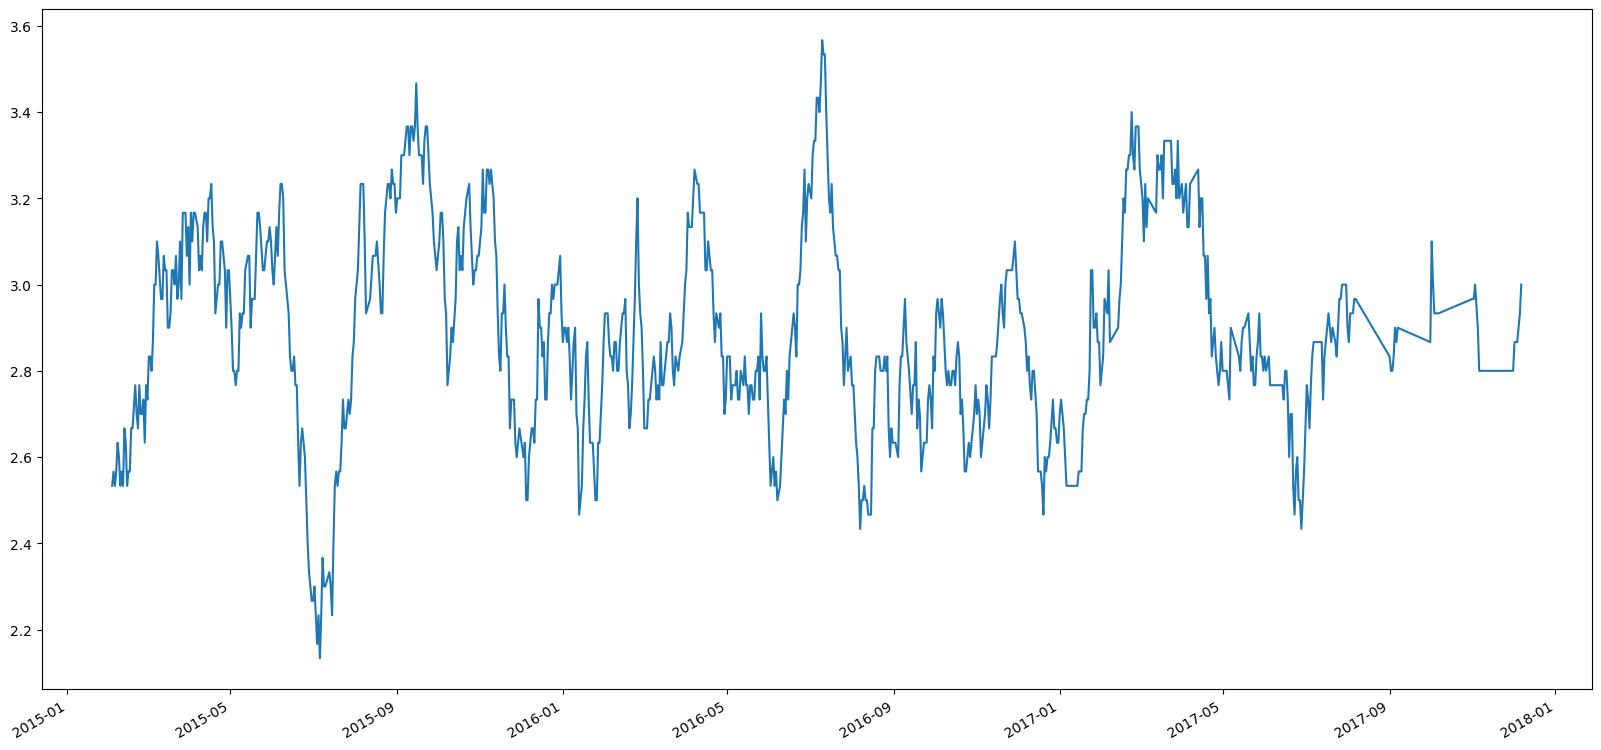

In [74]:
#series plot
rolling = df_fatalities['date'].value_counts().sort_index().rolling(30).mean()
rolling.plot(figsize=(20, 10))

# Epilogue

 [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).
 